In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pprint import pprint
from scipy.interpolate import griddata
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.validation import make_valid
from scipy.spatial import ConvexHull
import math


In [24]:
with open(r"SLAM.pickle", "rb") as input_file:
    e = pickle.load(input_file)

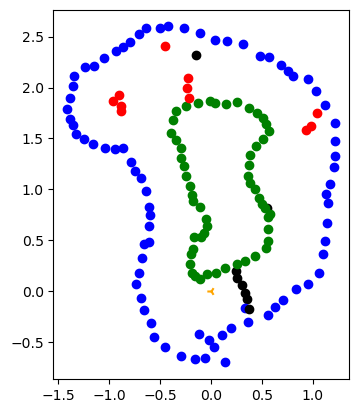

In [25]:
positions=e['positions']
ids=e['ids']
for i,pos_zip in enumerate(zip(positions, ids)):
    # print(pos_zip[1])
    col=pos_zip[1]%3
    if col==0:
        col2='green'
    elif col==1:
        col2='red'
    elif col==2:
        col2='blue'
    if pos_zip[1]<100:
        col2='black'
    plt.scatter(*pos_zip[0], color=col2)

plt.scatter(0,0, color='orange',marker='3',)
plt.gca().set_aspect('equal')
plt.show()

In [26]:
positions_array=np.array(positions)

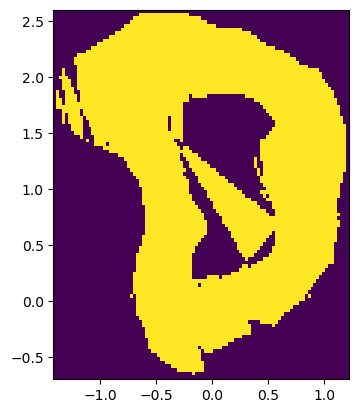

In [17]:
positions_array=np.array(positions)

mask_external=(ids%3==2) & (ids>=100) & (ids<=1000)
mask_internal = (ids%3==0)& (ids>=100) & (ids<=1000)

positions_external=positions_array[mask_external]
positions_internal=positions_array[mask_internal]

# Create polygons from the points
poly1 = Polygon(positions_external)
poly2 = Polygon(positions_internal)

x = np.linspace(min(np.concatenate([positions_external[:, 0], positions_internal[:, 0]])), max(np.concatenate([positions_external[:, 0], positions_internal[:, 0]])), 100)
y = np.linspace(min(np.concatenate([positions_external[:, 1], positions_internal[:, 1]])), max(np.concatenate([positions_external[:, 1], positions_internal[:, 1]])), 100)
X, Y = np.meshgrid(x, y)

# Create a mask where the pixels inside the first circle and outside the second circle are set to 1, and all others are set to 0
mask = np.array([[poly1.contains(Point(x[i], y[j])) and not poly2.contains(Point(x[i], y[j])) for i in range(len(x))] for j in range(len(y))])

plt.imshow(mask, interpolation='nearest', origin='lower', extent=[min(x), max(x), min(y), max(y)])
plt.show()

In [18]:
poly1.is_valid

False

In [19]:
poly1.exterior.coords[:]

[(0.3582500587133168, -0.3039803519321408),
 (0.33606642123465175, -0.170198512594106),
 (0.5556391426486164, -0.23918165526454696),
 (0.6272181472928308, -0.15800525632574486),
 (0.706249119480429, -0.08698007509131371),
 (0.9512718679735428, 0.06884529105573418),
 (0.8310611176225762, 0.024004362992077387),
 (1.0987716012182849, 0.3680676408084661),
 (1.056832135969151, 0.17559149158632886),
 (1.1421851797196527, 0.6700998450239248),
 (1.1299921989237547, 0.9511233545483554),
 (1.152317447921873, 0.8658621998798091),
 (1.1153266501120385, 0.4963554705401499),
 (1.165223856625857, 1.0480474053185889),
 (1.2083534767725663, 1.2151369094769677),
 (1.2200665658509673, 1.328090645068756),
 (1.2207390013268509, 1.4758338582228852),
 (1.1182509804180407, 1.8293420785184593),
 (1.21554278983377, 1.6549490544703187),
 (1.0289027788458598, 1.96571858747672),
 (0.9537272908548334, 2.0830078191770363),
 (0.8076678034469975, 2.110548034301205),
 (0.756060252483055, 2.165128968130445),
 (0.5734807

In [60]:
# Algorithm to find the polygon
nodes=[]
def distance(node_i, positions_external):
    # return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    return np.sqrt(((positions_external[node_i]- positions_external[node_i+1])**2).sum())


final_order=[]


n=positions_external.shape[0]
max_dist = 0.2

for node_i in range(n-2):
    if distance(node_i, positions_external)>max_dist:
        # print(node_i)
        nodes.append(node_i) # to plot stuff
        distances_following=[]
        for index_j in range(node_i, node_i+20): # checks following 20 nodes
            if index_j<n-2:
                distances_following.append(distance(index_j, positions_external))
        index_j_min=np.array(distances_following).argmin()

        final_order.append(index_j_min)
    else:
        final_order.append(node_i)
        
        




In [116]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __repr__(self):
        return self.data

class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(data=nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(data=elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next
    def add_first(self, node):
        node.next = self.head
        self.head = node
    def add_last(self, node):
        if self.head is None:
            self.head = node
            return
        for current_node in self:
            pass
        current_node.next = node
    

def inserAtEnd(self, data):
    new_node = Node(data)
    if self.head is None:
        self.head = new_node
        return
 
    current_node = self.head
    while(current_node.next):
        current_node = current_node.next
 
    current_node.next = new_node




In [120]:
llist=LinkedList(list(map(str,positions_external)))
print(llist)
llist.head

[ 0.35825006 -0.30398035] -> [ 0.33606642 -0.17019851] -> [ 0.55563914 -0.23918166] -> [ 0.62721815 -0.15800526] -> [ 0.70624912 -0.08698008] -> [0.95127187 0.06884529] -> [0.83106112 0.02400436] -> [1.0987716  0.36806764] -> [1.05683214 0.17559149] -> [1.14218518 0.67009985] -> [1.1299922  0.95112335] -> [1.15231745 0.8658622 ] -> [1.11532665 0.49635547] -> [1.16522386 1.04804741] -> [1.20835348 1.21513691] -> [1.22006657 1.32809065] -> [1.220739   1.47583386] -> [1.11825098 1.82934208] -> [1.21554279 1.65494905] -> [1.02890278 1.96571859] -> [0.95372729 2.08300782] -> [0.8076678  2.11054803] -> [0.75606025 2.16512897] -> [0.57348074 2.29969183] -> [0.68447628 2.22030013] -> [0.47754039 2.30791434] -> [0.31646893 2.4273037 ] -> [0.15633676 2.45740115] -> [0.04324106 2.46432838] -> [-0.10475628  2.53503482] -> [-0.26518115  2.5849462 ] -> [-0.50645024  2.5839859 ] -> [-0.41888237  2.60018422] -> [-0.6399391   2.58049565] -> [-0.86217449  2.40225459] -> [-0.70856413  2.52893161] -> [-0.

[ 0.35825006 -0.30398035]

In [100]:
for node in llist:
    print(node)

a
b
c
d
e
f


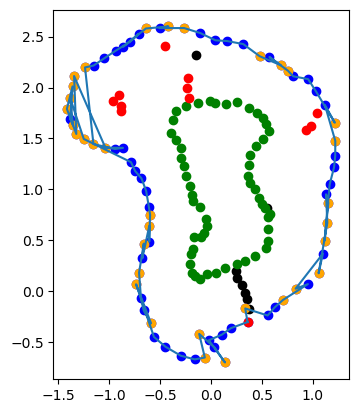

In [61]:
plt.plot(*poly1.exterior.xy)
plt.gca().set_aspect('equal')
for i,pos_zip in enumerate(zip(positions, ids)):
    # print(pos_zip[1])
    col=pos_zip[1]%3
    if col==0:
        col2='green'
    elif col==1:
        col2='red'
    elif col==2:
        col2='blue'
    if pos_zip[1]<=100:
        col2='black'
    plt.scatter(*pos_zip[0], color=col2)
for i in range(len(nodes)):
    plt.scatter(*positions_external[nodes[i]], c='orange')
plt.scatter(*positions_external[0], c='red')
plt.show()
